In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\Deep Learning new\\Artifical Neural Network\\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Basic Data Understanding

In [3]:
df.drop(['customerID'],axis='columns',inplace=True)
print(f'Shape of the Dataset:{df.shape}\n')
print(f'Null Values in Dataset:\n{df.isnull().sum()}\n')
print(f'Duplicated Values in Dataset:{df.duplicated().sum()}\n')
print(f'Drop Duplicated Values:{df.drop_duplicates(inplace=True)}\n')
print(f'Basic Information about Dataset:{df.info()}')

Shape of the Dataset:(7043, 20)

Null Values in Dataset:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicated Values in Dataset:22

Drop Duplicated Values:None

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int6

In [4]:
df_cate=df.select_dtypes(include='object')
df_category=df_cate.columns
print(f'Total Numbers of Categorical variable is {len(df_category)}')
df_num=df.select_dtypes(include='number')
df_number=df_num.columns
print(f'Total Number of Numerical data is {len(df_number)}')

Total Numbers of Categorical variable is 17
Total Number of Numerical data is 3


In [5]:
print(f'Basic Summary of Numerical Features:\n{df.describe()}')

Basic Summary of Numerical Features:
       SeniorCitizen       tenure  MonthlyCharges
count    7021.000000  7021.000000     7021.000000
mean        0.162512    32.469449       64.851894
std         0.368947    24.534965       30.069001
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.750000
50%         0.000000    29.000000       70.400000
75%         0.000000    55.000000       89.900000
max         1.000000    72.000000      118.750000


In [6]:
print(f"Basic Summary of Categorical Features:\n{df.describe(include='object')}")

Basic Summary of Categorical Features:
       gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7021    7021       7021         7021          7021            7021   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3541    3619       4911         6339          3368            3090   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7021         7021             7021        7021        7021   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3490         3080             3087        3465        2802   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7021            7021             7021              7021   
unique         

# Data handling

### Convert TotalCharges data type from object to integer

In [7]:
df[df.TotalCharges==' '].shape

(11, 20)

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.shape

(7021, 20)

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

# Exploratory Data Analysis

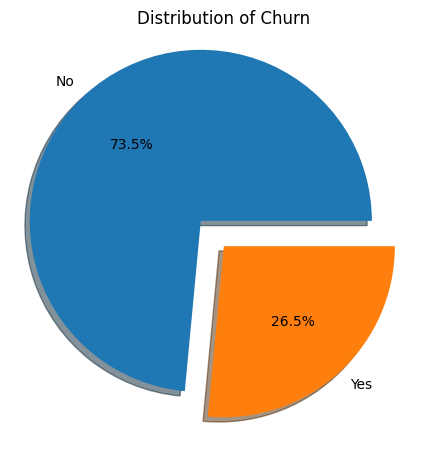

In [11]:
count=df.Churn.value_counts()
index=np.argmax(count)
explode=[0.2 if i == index else 0 for i in range(len(count))]
plt.pie(count,labels=count.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Churn")
plt.tight_layout()

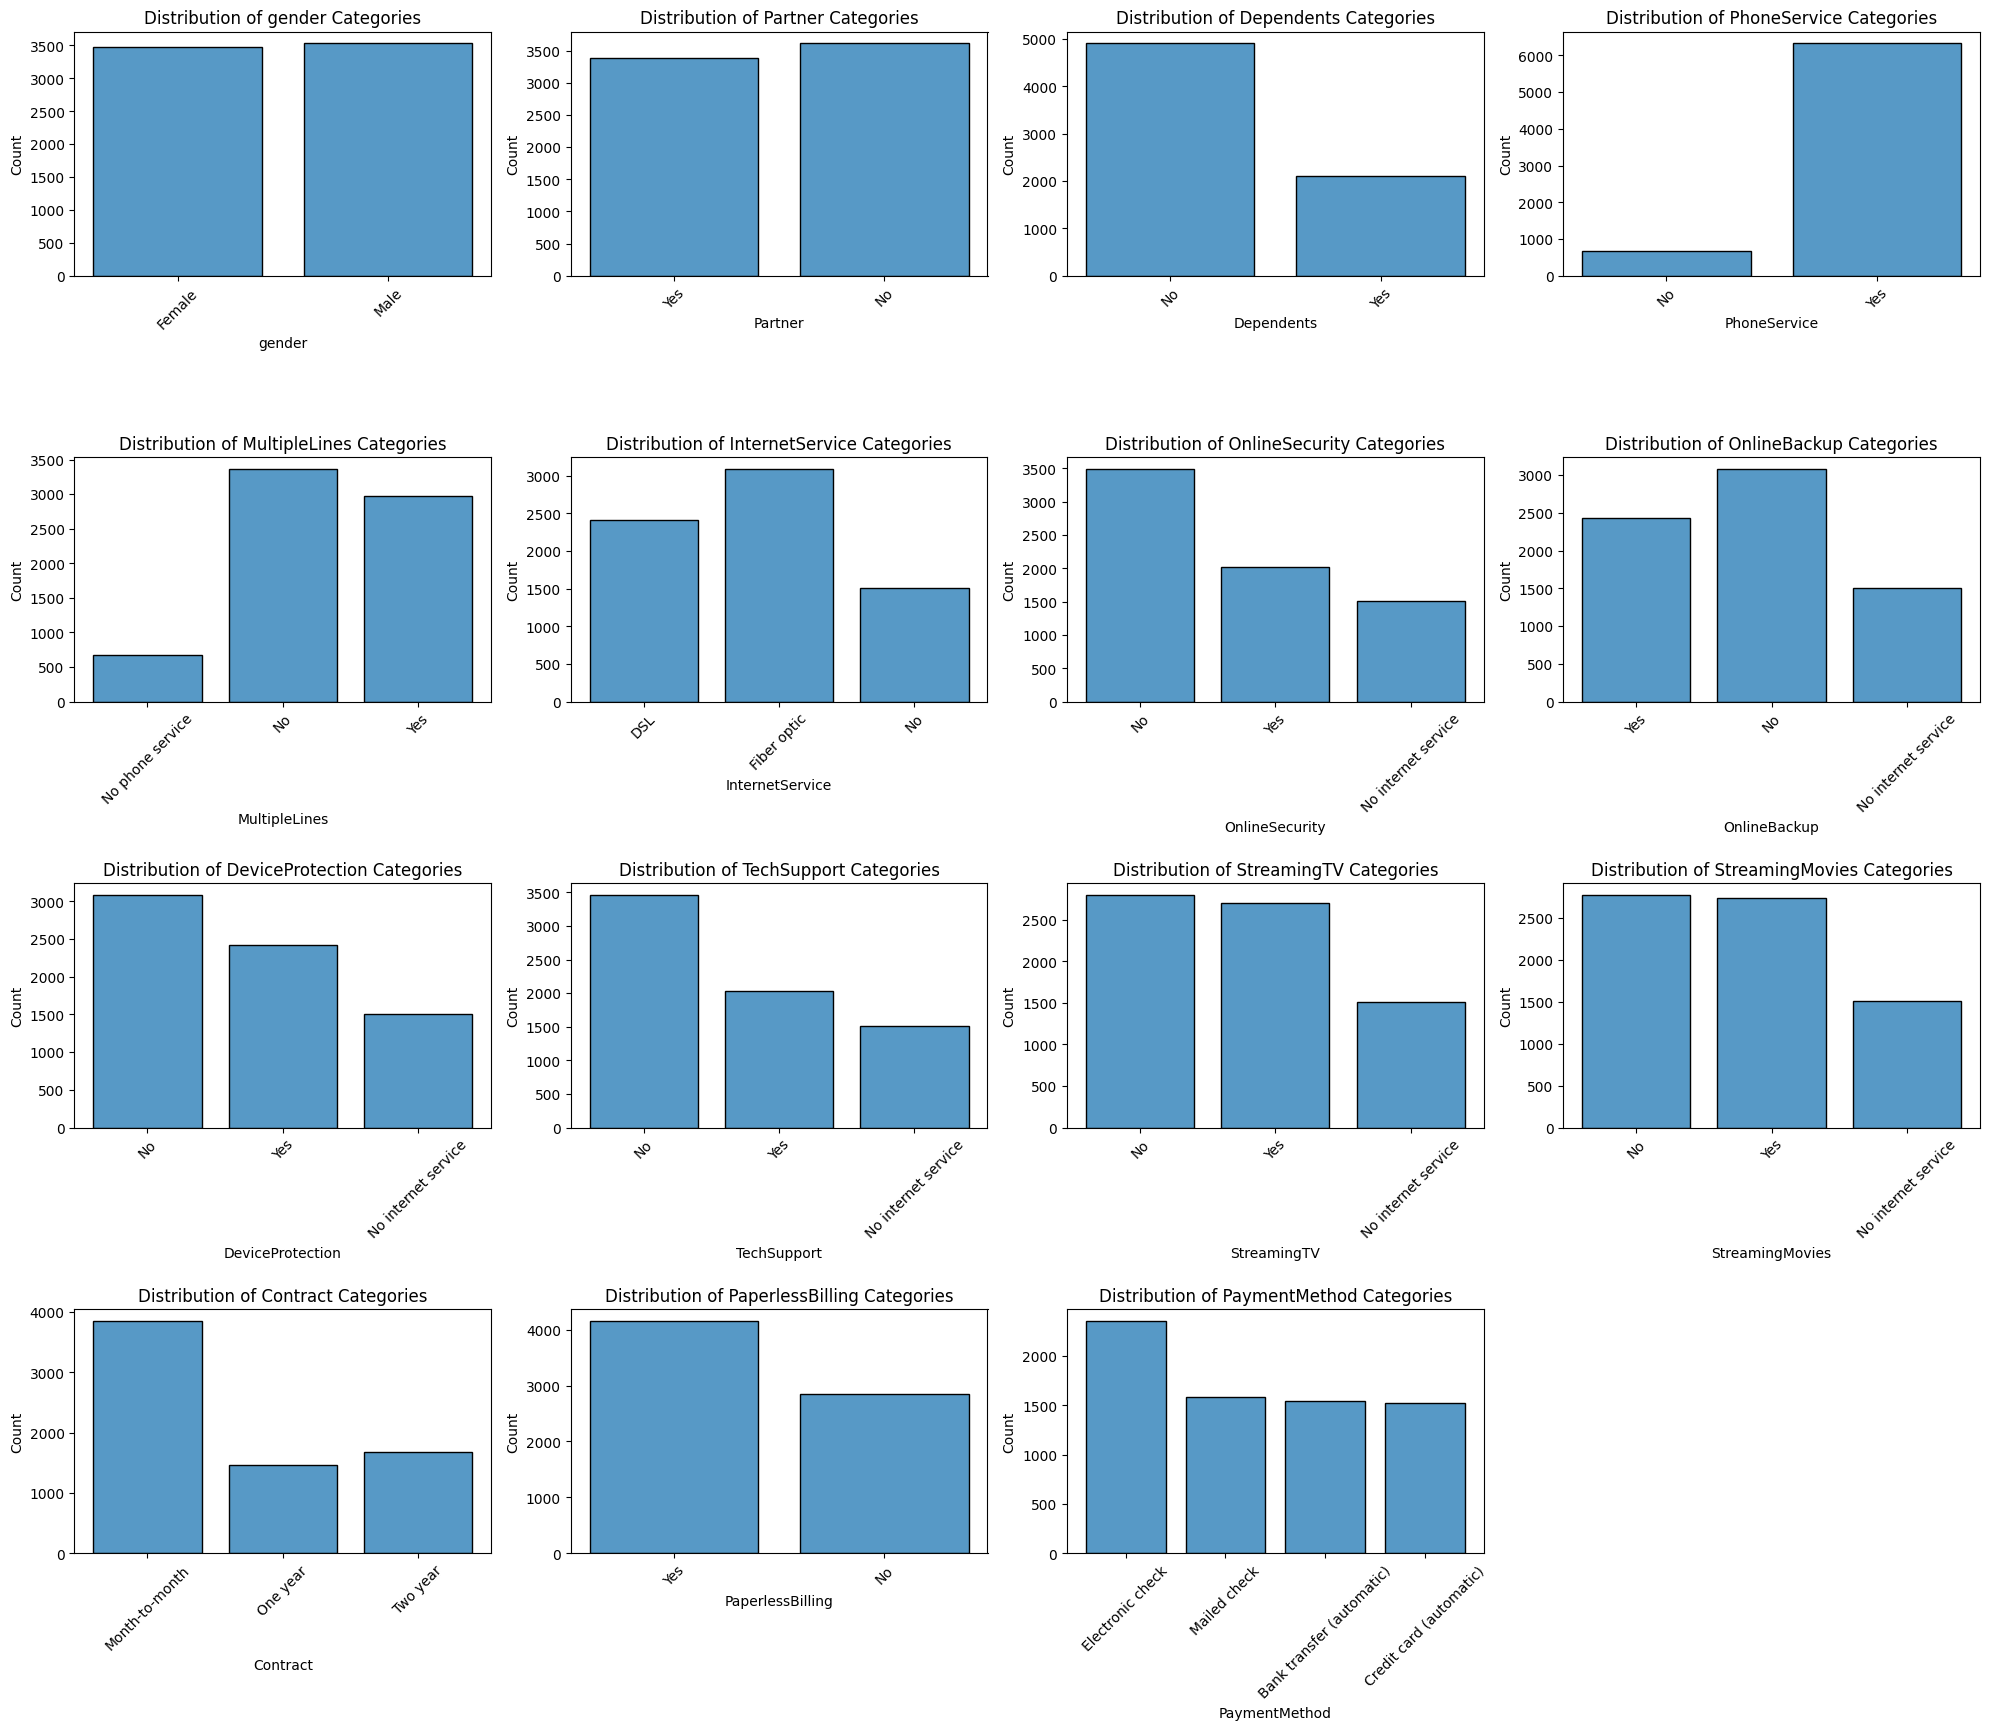

In [12]:
plt.figure(figsize=(20,20))
df_cate=df.select_dtypes(include='object')
for i,col in enumerate(df_cate):
    if col!='Churn':
        plt.subplot(5,4,i+1)
        sns.histplot(data=df,x=col,binwidth=1, shrink=0.8)
        plt.title(f'Distribution of {col} Categories')
        plt.xticks(rotation=45)
plt.tight_layout()

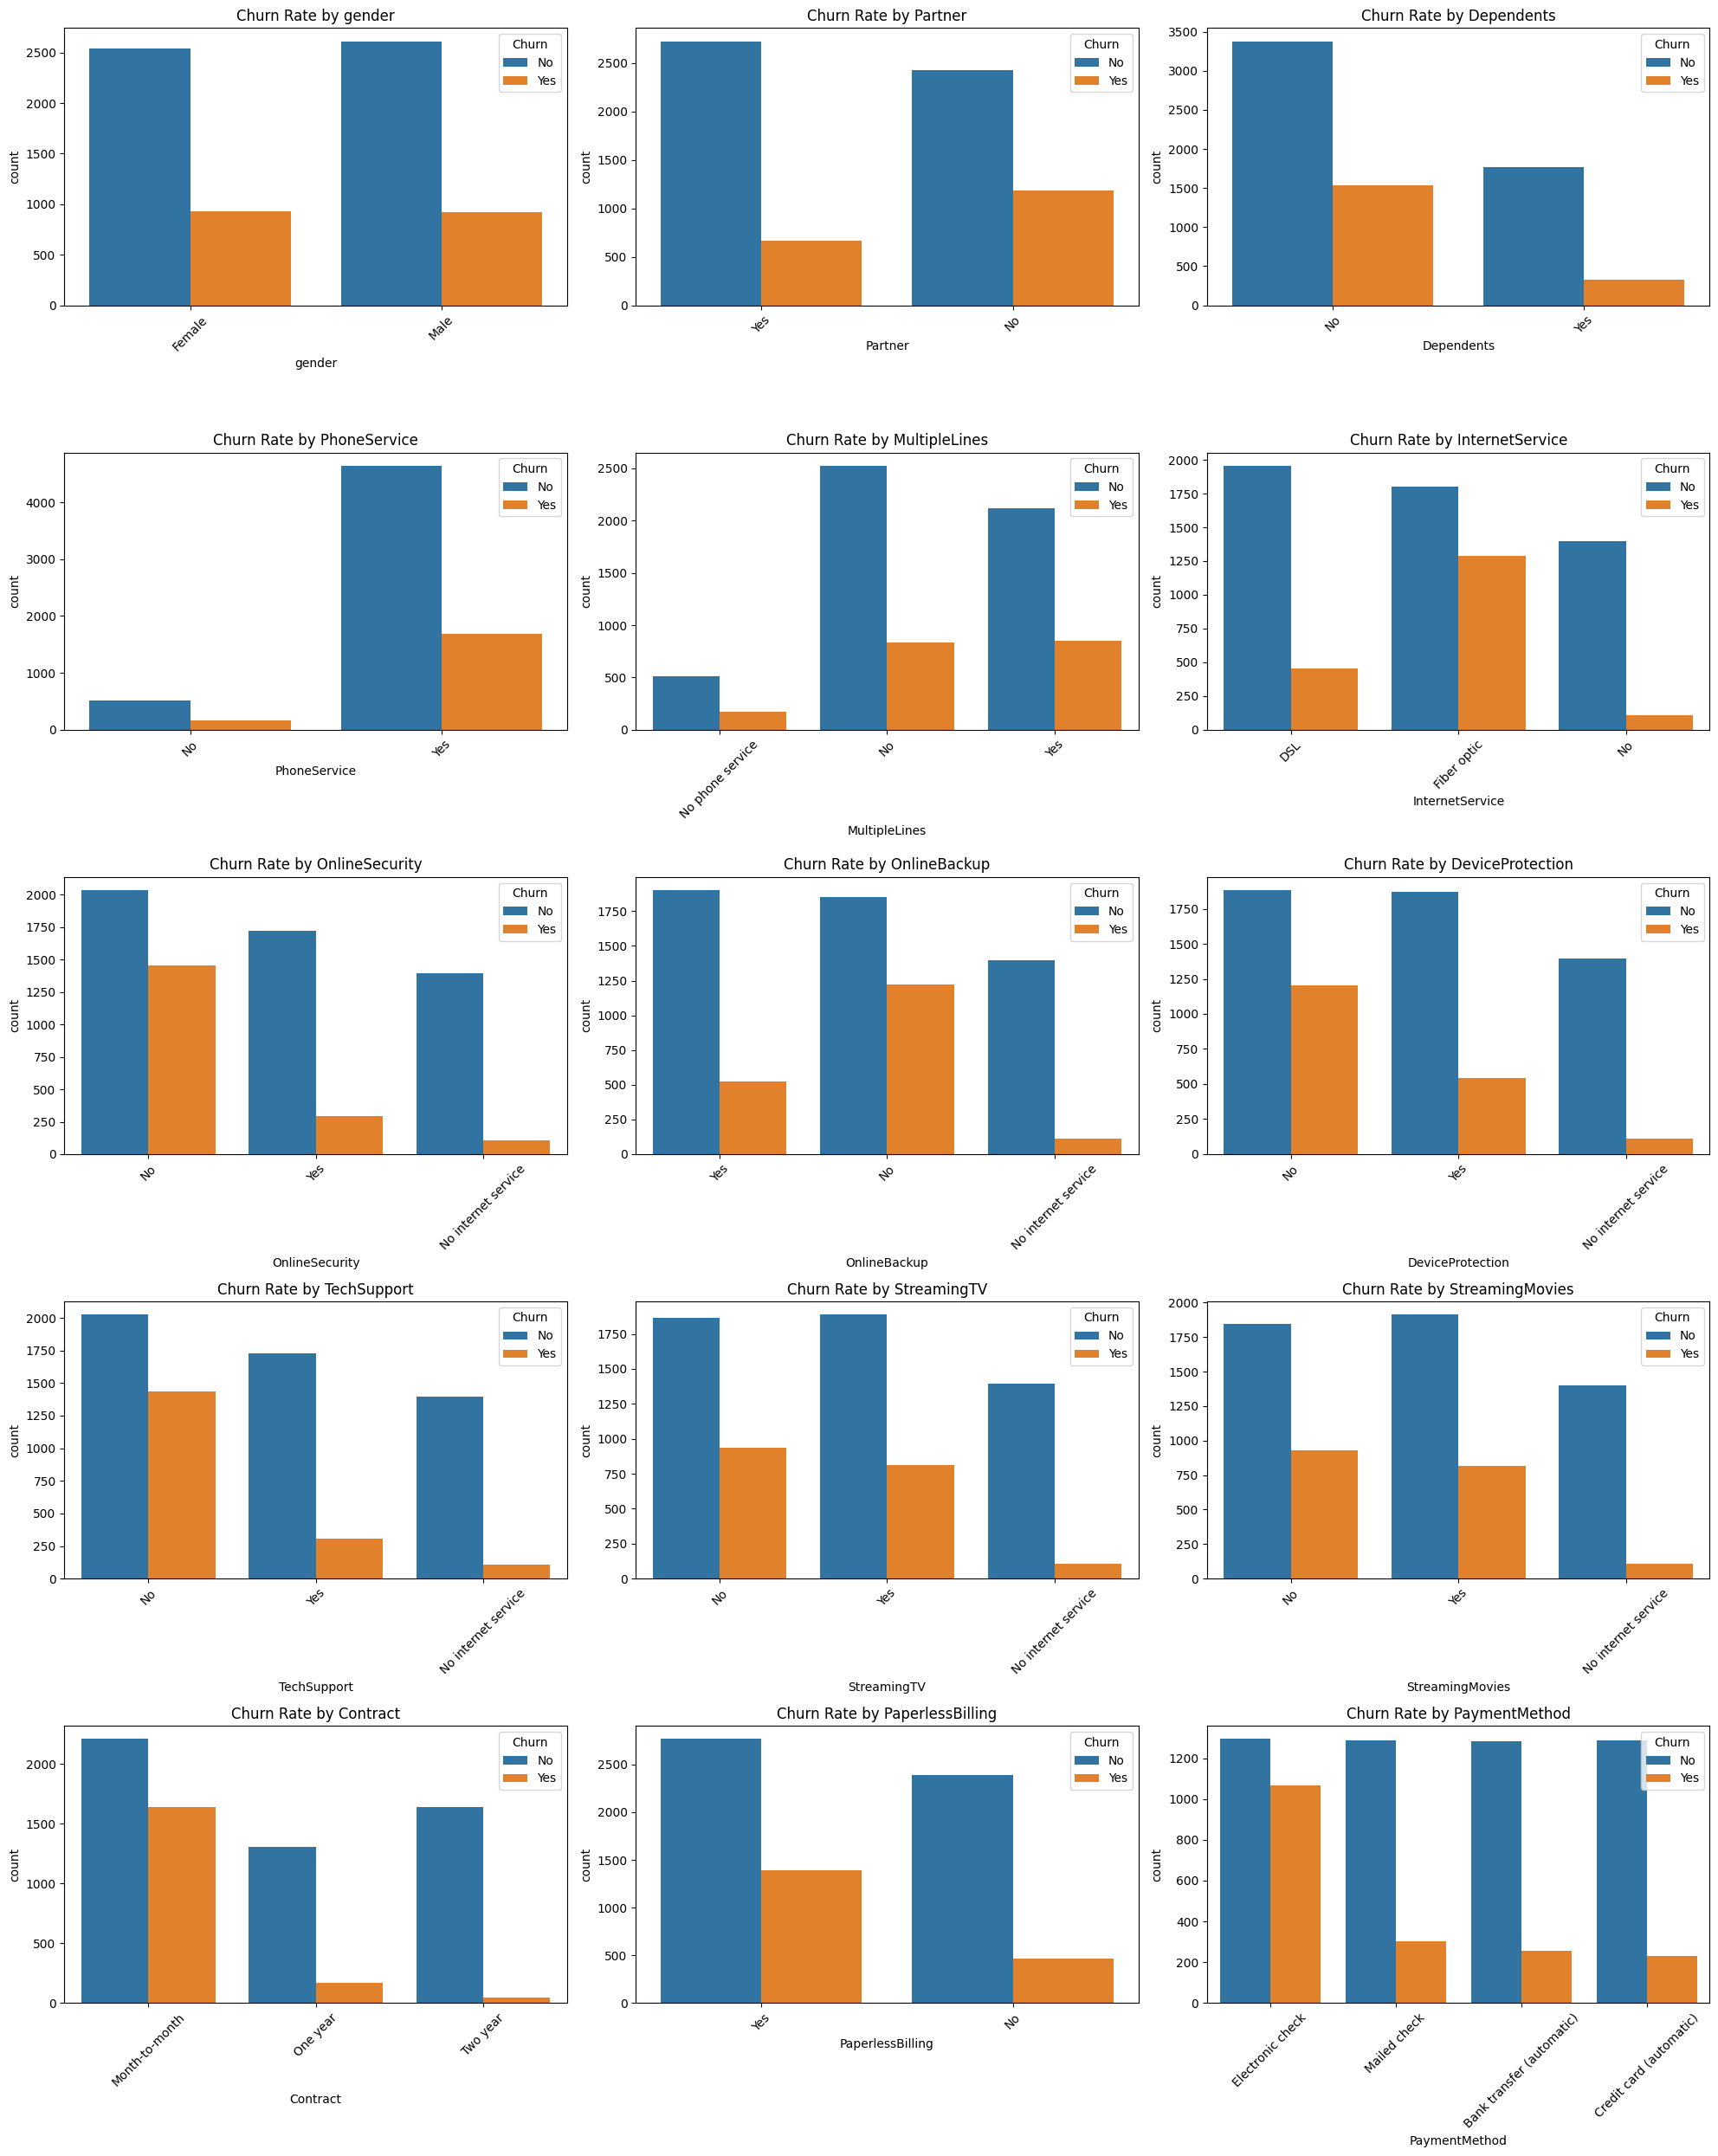

In [13]:
plt.figure(figsize=(20,25))
df_cate=df.select_dtypes(include='object')
for i,col in enumerate(df_cate):
    if col!='Churn':
        plt.subplot(5,3,i+1)
        sns.countplot(data=df,x=col,hue='Churn')
        plt.title(f'Churn Rate by {col}')
        plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Monthly Charges vs Total Charges (Churn Split)')

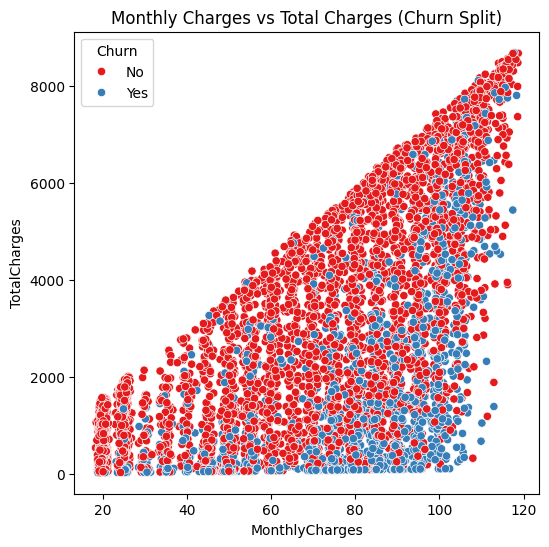

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',palette='Set1')
plt.title('Monthly Charges vs Total Charges (Churn Split)')

Text(0.5, 1.0, 'Tenure vs Monthly Charges (Churn Split)')

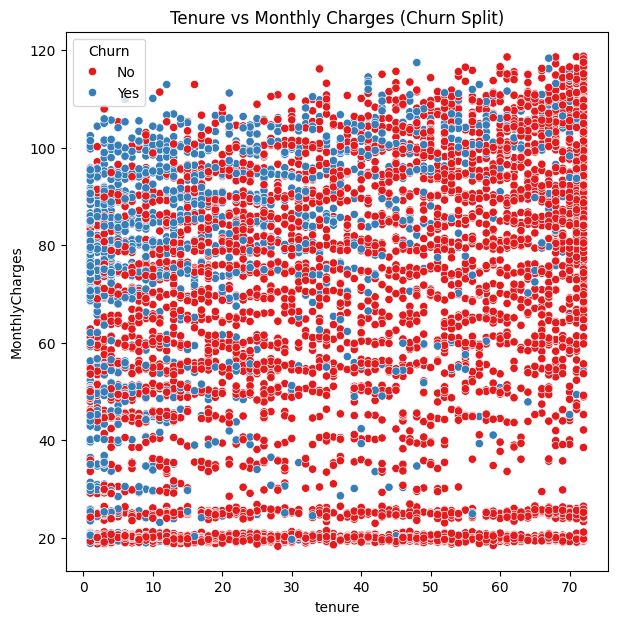

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x='tenure',y='MonthlyCharges',hue='Churn',palette='Set1')
plt.title('Tenure vs Monthly Charges (Churn Split)')

In [16]:
df_No_Churn=df[df['Churn']=='No']
df_Yes_Churn=df[df['Churn']=='Yes']

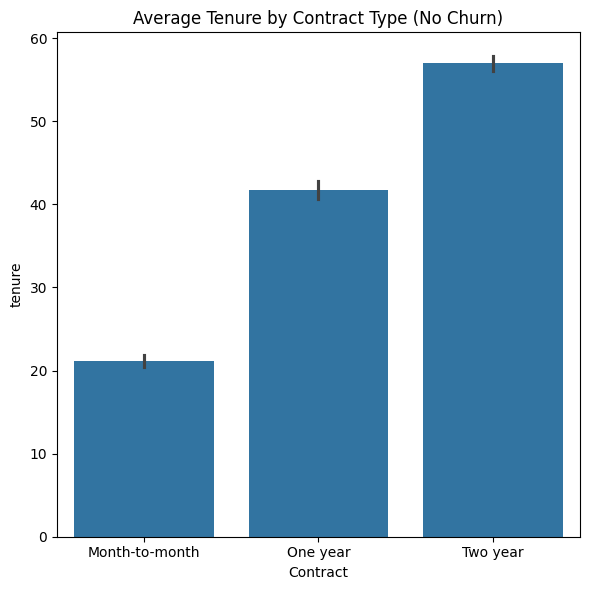

In [17]:
plt.figure(figsize=(6,6))
sns.barplot(data=df_No_Churn, x='Contract', y='tenure')
plt.title('Average Tenure by Contract Type (No Churn)')
plt.tight_layout()

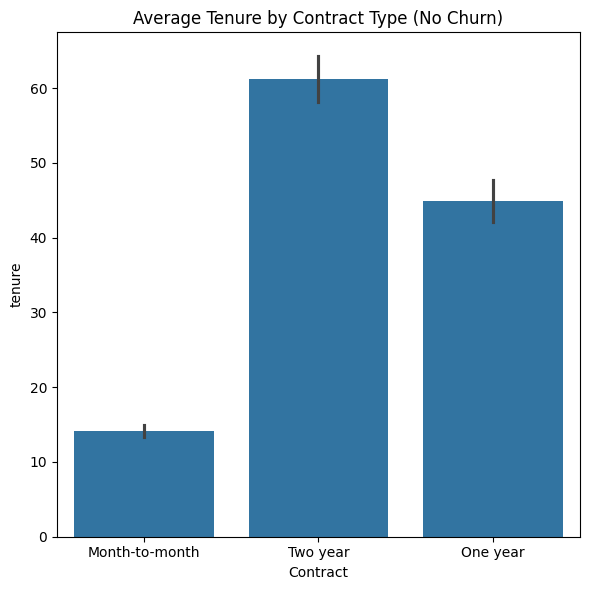

In [18]:
plt.figure(figsize=(6,6))
sns.barplot(data=df_Yes_Churn, x='Contract', y='tenure')
plt.title('Average Tenure by Contract Type (No Churn)')
plt.tight_layout()

In [19]:
for i ,col in enumerate(df_cate):
    info=df_No_Churn.groupby('Churn')[col].value_counts(normalize=True)
    print(f'\nChurn = No | Value counts for {col}:\n{info}\n')


Churn = No | Value counts for gender:
Churn  gender
No     Male      0.506889
       Female    0.493111
Name: proportion, dtype: float64


Churn = No | Value counts for Partner:
Churn  Partner
No     Yes        0.528624
       No         0.471376
Name: proportion, dtype: float64


Churn = No | Value counts for Dependents:
Churn  Dependents
No     No            0.655929
       Yes           0.344071
Name: proportion, dtype: float64


Churn = No | Value counts for PhoneService:
Churn  PhoneService
No     Yes             0.901029
       No              0.098971
Name: proportion, dtype: float64


Churn = No | Value counts for MultipleLines:
Churn  MultipleLines   
No     No                  0.490200
       Yes                 0.410829
       No phone service    0.098971
Name: proportion, dtype: float64


Churn = No | Value counts for InternetService:
Churn  InternetService
No     DSL                0.379779
       Fiber optic        0.349117
       No                 0.271104
Name: propor

In [20]:
for i ,col in enumerate(df_cate):
    info=df_Yes_Churn.groupby('Churn')[col].value_counts(normalize=True)
    print(f'\nChurn = No | Value counts for {col}:\n{info}\n')


Churn = No | Value counts for gender:
Churn  gender
Yes    Female    0.502962
       Male      0.497038
Name: proportion, dtype: float64


Churn = No | Value counts for Partner:
Churn  Partner
Yes    No         0.639742
       Yes        0.360258
Name: proportion, dtype: float64


Churn = No | Value counts for Dependents:
Churn  Dependents
Yes    No            0.824448
       Yes           0.175552
Name: proportion, dtype: float64


Churn = No | Value counts for PhoneService:
Churn  PhoneService
Yes    Yes             0.908454
       No              0.091546
Name: proportion, dtype: float64


Churn = No | Value counts for MultipleLines:
Churn  MultipleLines   
Yes    Yes                 0.457728
       No                  0.450727
       No phone service    0.091546
Name: proportion, dtype: float64


Churn = No | Value counts for InternetService:
Churn  InternetService
Yes    Fiber optic        0.695207
       DSL                0.246096
       No                 0.058697
Name: propor

# Data Preprocessing

In [21]:
for col in df:
    print(f'unique values in {col}\n is {df[col].unique()}')

unique values in gender
 is ['Female' 'Male']
unique values in SeniorCitizen
 is [0 1]
unique values in Partner
 is ['Yes' 'No']
unique values in Dependents
 is ['No' 'Yes']
unique values in tenure
 is [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique values in PhoneService
 is ['No' 'Yes']
unique values in MultipleLines
 is ['No phone service' 'No' 'Yes']
unique values in InternetService
 is ['DSL' 'Fiber optic' 'No']
unique values in OnlineSecurity
 is ['No' 'Yes' 'No internet service']
unique values in OnlineBackup
 is ['Yes' 'No' 'No internet service']
unique values in DeviceProtection
 is ['No' 'Yes' 'No internet service']
unique values in TechSupport
 is ['No' 'Yes' 'No internet service']
unique values in StreamingTV
 is ['No' 'Yes' 'No internet service']
unique values in StreamingMovies
 is ['No' 'Yes' 'N

In [22]:
df.replace({'No internet service':'No'},inplace=True)
df.replace({'No phone service':'No'},inplace=True)

In [23]:
def replace(df,features):
    for feature in features:
        df[feature].replace({'Yes':1,'No':0},inplace=True)

In [24]:
data=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
      'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
replace(df,data)
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_16172\2825161193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].replace({'Yes':1,'No':0},inplace=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_16172\2825161193.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[featur

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Handling imbalance dataset

In [26]:
x=df.drop(['Churn'],axis='columns')
y=df['Churn']

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_resample,y_resample=smote.fit_resample(x,y)

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train_re,x_test_re,y_train_re,y_test_re=train_test_split(X_resample,y_resample,random_state=42,test_size=0.2)

# Model Training and Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train_re,y_train_re)

C:\Users\Qadri Laptop\PycharmProjects\numpy\Deep_Learning\deep\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
print(f'The Accuracy of the Model is:{(LR.score(x_test_re,y_test_re))*100}%')

The Accuracy of the Model is:81.91076624636275%


Text(0.5, 1.0, 'Confusion Matix')

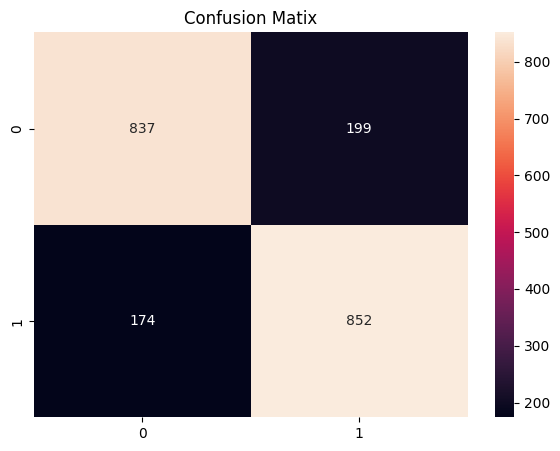

In [33]:
from sklearn.metrics import confusion_matrix
y_predicted=LR.predict(x_test_re)
cm=confusion_matrix(y_test_re,y_predicted)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matix")